In [1]:
%matplotlib inline
import matplotlib 
import os.path
import numpy as np
import scipy.linalg as la
from numpy import *
from os import path
home = path.expanduser("~")

from matplotlib import animation
import matplotlib.pyplot as plt


working_path = "reduction_factor/"
Alpha_File = loadtxt(path.join(working_path, "necessary_causality_reduction_factor_pAu_new.dat"))
Beta_File = loadtxt(path.join(working_path, "sufficient_causality_reduction_factor_pAu_new.dat"))

In [2]:
# define format for the plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6., 4.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

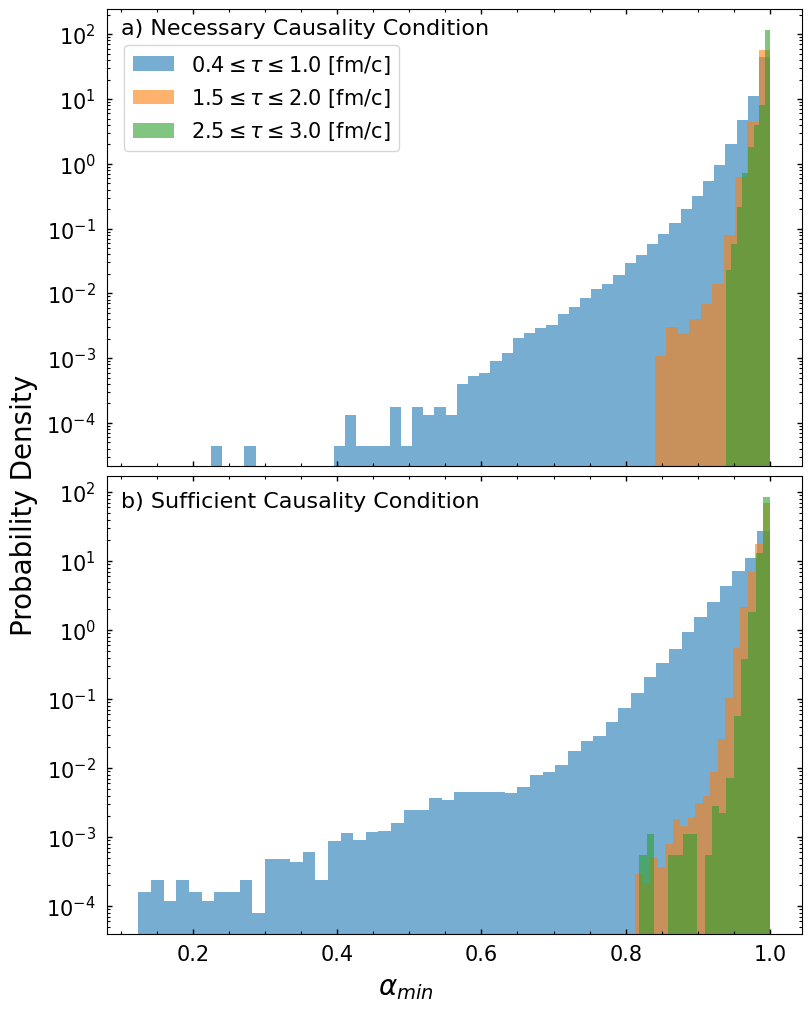

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(8,10),
        constrained_layout=True)

#Alpha_0.4-1.0
idx_a = (Alpha_File[:,1] > 0.9) & (Alpha_File[:,2] > 0.4) & (Alpha_File[:,2] < 1.0)
dense_a = Alpha_File[idx_a,:]
ax1.hist(dense_a[:,0], 50, alpha = 0.6, density = True)

#Alpha_1.5-2.0
idx_a = (Alpha_File[:,1] > 0.9) & (Alpha_File[:,2] > 1.5) & (Alpha_File[:,2] < 2.0)
dense_a = Alpha_File[idx_a,:]
ax1.hist(dense_a[:,0], 10, alpha = 0.6, density = True)

#Alpha_2.5-3.0
idx_a = (Alpha_File[:,1] > 0.9) & (Alpha_File[:,2] > 2.5) & (Alpha_File[:,2] < 3.0)
dense_a = Alpha_File[idx_a,:]
ax1.hist(dense_a[:,0], 8, alpha = 0.6, density = True)

#Beta_0.4-1.0
idx_b = (Beta_File[:,1] > 0.9) & (Beta_File[:,2] > 0.4) & (Beta_File[:,2] < 1.0)
dense_b = Beta_File[idx_b,:]
ax2.hist(dense_b[:,0], 50, alpha = 0.6, density = True)

#Beta_1.5-2.0
idx_b = (Beta_File[:,1] > 0.9) & (Beta_File[:,2] > 1.5) & (Beta_File[:,2] < 2.0)
dense_b = Beta_File[idx_b,:]
ax2.hist(dense_b[:,0], 18, alpha = 0.6, density = True)

#Beta_2.5-3.0
idx_b = (Beta_File[:,1] > 0.9) & (Beta_File[:,2] > 2.5) & (Beta_File[:,2] < 3.0)
dense_b = Beta_File[idx_b,:]
ax2.hist(dense_b[:,0], 18, alpha = 0.6, density = True)

ax1.set_yscale('log')
ax2.set_yscale('log')
fig.supxlabel(r"$\alpha_{min}$", fontsize=20)
fig.supylabel(r"Probability Density", fontsize=20)
ax1.legend([r"$0.4 \leq \tau \leq 1.0$ [fm/c]", r"$1.5 \leq \tau \leq 2.0$ [fm/c]", 
            r"$2.5 \leq \tau \leq 3.0$ [fm/c]"], loc=(0.025, 0.69), prop={'size': 15})
ax1.text(0.1, 100, r"a) Necessary Causality Condition", fontsize=16)
ax2.text(0.1, 60, r"b) Sufficient Causality Condition", fontsize=16)
plt.savefig("Regulation_factor_suboplot10.pdf", format="pdf")

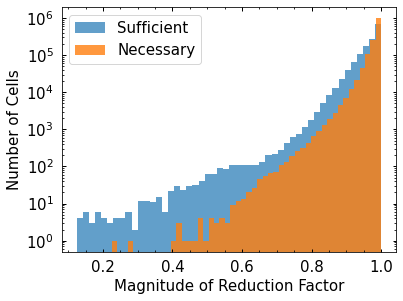

In [29]:
#Beta
idx_b = (Beta_File[:,1] > 0.9) & (Beta_File[:,2] > 0.4) & (Beta_File[:,2] < 1.0)
dense_b = Beta_File[idx_b,:]
plt.hist(dense_b[:,0], 50, alpha = 0.7)

#Alpha
idx_a = (Alpha_File[:,1] > 0.9) & (Alpha_File[:,2] > 0.4) & (Alpha_File[:,2] < 1.0)
dense_a = Alpha_File[idx_a,:]
plt.hist(dense_a[:,0], 50, alpha = 0.8)

plt.yscale('log')
plt.xlabel('Magnitude of Reduction Factor')
plt.ylabel('Number of Cells')
plt.legend([r"Sufficient", r"Necessary"], loc='upper left')
plt.savefig("Regulation_factor_distribution_0.4-1.0.pdf", format="pdf")
#0.4-1.0 ;1.5-2.0; 2.5-3

In [6]:
#Alpha 
idx_a = Alpha_File[:,1] > 0.9
dense_a = Alpha_File[idx_a,:]
avg_alpha = []
temp_alpha = []
tau_a = []
cur_tau = 0.

for i in range (len(dense_a[:,2])):        
    if dense_a[i,2] != cur_tau:
        if temp_alpha:
            avg_alpha.append(mean(temp_alpha))
            temp_alpha.clear()    
        tau_a.append(dense_a[i,2]) #add new tau
        cur_tau = dense_a[i,2] #update new tau
        temp_alpha.append(dense_a[i,0]) #add temp_alp
    else:
        temp_alpha.append(dense_a[i,0])
if temp_alpha:
    avg_alpha.append(mean(temp_alpha))
    temp_alpha.clear()

In [21]:
#Beta

idx_bf = Beta_File_f[:,1] > 0.9
dense_bf = Beta_File_f[idx_bf,:]
avg_beta = []
temp_beta = []
tau_b = []
cur_tau = 0.

for i in range (len(dense_b[:,2])):        
    if dense_b[i,2] != cur_tau:
        if temp_beta:
            avg_beta.append(mean(temp_beta))
            temp_beta.clear()    
        tau_b.append(dense_b[i,2]) #add new tau
        cur_tau = dense_b[i,2] #update new tau
        temp_beta.append(dense_b[i,0]) #add temp_alp
    else:
        temp_beta.append(dense_b[i,0])
if temp_beta:
    avg_beta.append(mean(temp_beta))
    temp_beta.clear()

IndexError: index 2 is out of bounds for axis 1 with size 2

1078


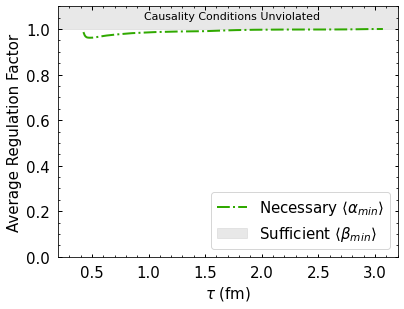

In [44]:
fig = plt.figure()
x = np.linspace(0,3.2,200)
#plt.plot(tau_a[577:], avg_alpha[577:], c='#D00000')
plt.plot(tau_b[550:], avg_beta[550:], linestyle="dashdot", c='#30A900')
plt.fill_between(x, 1, 1.1, color='lightgray',alpha=.5)
plt.xlabel(r"$\tau$ (fm)")
plt.ylabel(r"Average Regulation Factor")
plt.legend([r"Necessary $\langle \alpha_{min} \rangle$", r"Sufficient $\langle \beta_{min} \rangle$"], loc='lower right')
plt.tight_layout()
plt.ylim(ymin=0., ymax=1.1)
plt.xlim(xmin=0.2, xmax=3.2)
plt.text(0.96,1.042,r"Causality Conditions Unviolated",fontsize=11)
#plt.axhline(y=1.0, color='gray', linestyle="dashed")
plt.savefig("Regulation_factor_0initial_sufficient.pdf", format="pdf")
print(len(avg_alpha))